In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm # training time estimation

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

In [3]:
import torch.nn as nn
import torch.nn.functional as F

In [4]:
import torch.optim as optim

FRDEEP v2.0 datasdet foundation

In [5]:
from FRDEEPv2_foundation import FRDEEPv2

Transform operation

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5],[0.5])])

Object classes

In [7]:
classes = ('FR I', 'FR II')

Number of trainset samples + testset samples should be 658, which here is matched (460+198=658).

In [8]:
def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Loading dataset training set

In [9]:
trainset = FRDEEPv2(root1='./4_DataPickle_Generation/',root2='./4_DataPickle_Generation/',root3='./4_DataPickle_Generation/', train=True, download=False, transform=transform)
batch_size_train = 2
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True, num_workers=2)

(460, 150, 150, 1)
(460, 150, 150, 1)


Randomly extract 2 training sources.

In [10]:
dataiter = iter(trainloader)
images1_tr,images2_tr,object_id_tr,labels_tr = dataiter.next()

NVSS data visualization (train)

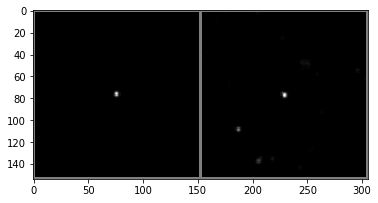

Object ID:  3C 270.1 TXS 1410+027
GroundTruth:  FR II FR II


In [11]:
# print images
imshow(torchvision.utils.make_grid(images1_tr))
print('Object ID: ', ' '.join('%5s' % object_id_tr[j] for j in range(batch_size_train)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels_tr[j]] for j in range(batch_size_train)))

FIRST data visualization (train)

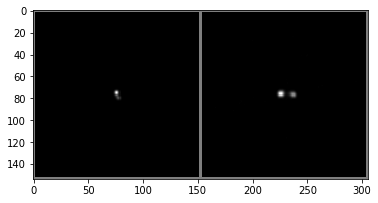

Object ID:  3C 270.1 TXS 1410+027
GroundTruth:  FR II FR II


In [12]:
# print images
imshow(torchvision.utils.make_grid(images2_tr))
print('Object ID: ', ' '.join('%5s' % object_id_tr[j] for j in range(batch_size_train)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels_tr[j]] for j in range(batch_size_train)))

Loading dataset testing set

In [17]:
testset = FRDEEPv2(root1='./4_DataPickle_Generation/',root2='./4_DataPickle_Generation/',root3='./4_DataPickle_Generation/', train=False, download=False, transform=transform)
batch_size_test = 2
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=True, num_workers=2)

(198, 150, 150, 1)
(198, 150, 150, 1)


Randomly extract 2 testing sources.

In [14]:
dataiter = iter(testloader)
images1_te,images2_te,object_id_te,labels_te = dataiter.next()

NVSS data visualization (test)

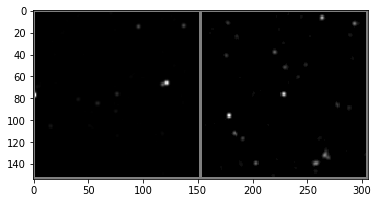

Object ID:  SDSS J082603.81+471910.3 SDSS J170543.99+583001.2
GroundTruth:   FR I  FR I


In [15]:
# print images
imshow(torchvision.utils.make_grid(images1_te))
print('Object ID: ', ' '.join('%5s' % object_id_te[j] for j in range(batch_size_test)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels_te[j]] for j in range(batch_size_test)))

FIRST data visualization (test)

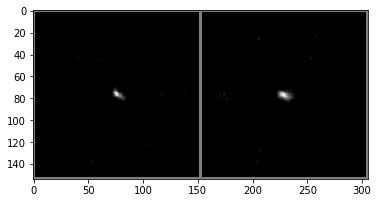

Object ID:  SDSS J082603.81+471910.3 SDSS J170543.99+583001.2
GroundTruth:   FR I  FR I


In [16]:
# print images
imshow(torchvision.utils.make_grid(images2_te))
print('Object ID: ', ' '.join('%5s' % object_id_te[j] for j in range(batch_size_test)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels_te[j]] for j in range(batch_size_test)))